In [ ]:
!pip install Quandl

In [ ]:
import pandas as pd #For data related tasks
import matplotlib.pyplot as plt #for data visualization 
import quandl #Stock market API for fetching Data
from sklearn.linear_model import LinearRegression

In [ ]:
quandl.ApiConfig.api_key = '' 
stock_data = quandl.get('NSE/TCS', start_date='2018-12-01', end_date='2018-12-31')
#Let's see the data
print(stock_data)

               Open     High      Low     Last    Close  Total Trade Quantity  \
Date                                                                            
2018-12-03  1984.00  1990.00  1968.30  1984.00  1982.40             1610576.0   
2018-12-04  1983.00  2019.40  1971.00  2009.85  2010.85             3270615.0   
2018-12-05  2006.00  2018.00  1985.00  2003.90  2006.75             2501539.0   
2018-12-06  1998.00  2017.00  1979.60  1990.00  1992.70             2321216.0   
2018-12-07  1985.05  2003.90  1973.00  1999.85  1995.20             1680420.0   
2018-12-10  1975.00  2011.00  1960.00  1961.00  1975.80             2010786.0   
2018-12-11  1970.00  2010.00  1961.00  1997.05  2000.00             2942014.0   
2018-12-12  2001.10  2022.00  1984.95  2016.50  2016.80             2219993.0   
2018-12-13  2024.00  2029.70  1974.50  1981.95  1982.60             3748429.0   
2018-12-14  1983.00  1998.95  1975.25  1989.00  1989.75             2473761.0   
2018-12-17  1999.00  2004.90

In [ ]:
dataset = pd.DataFrame(stock_data)

In [ ]:
dataset.head()
##convert into csv
dataset.to_csv('TCS.csv')

In [ ]:
data = pd.read_csv('TCS.csv')

In [ ]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-12-03,1984.00,1990.0,1968.3,1984.00,1982.40,1610576.0,31868.00
1,2018-12-04,1983.00,2019.4,1971.0,2009.85,2010.85,3270615.0,65568.23
2,2018-12-05,2006.00,2018.0,1985.0,2003.90,2006.75,2501539.0,50131.23
3,2018-12-06,1998.00,2017.0,1979.6,1990.00,1992.70,2321216.0,46373.71
4,2018-12-07,1985.05,2003.9,1973.0,1999.85,1995.20,1680420.0,33463.26


In [ ]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
#feature correlation
df1=data[["Open","High","Low"]]
df1.corr()

,Open,High,Low
Open,1.000000,0.937777,0.925625
High,0.937777,1.000000,0.935803
Low,0.925625,0.935803,1.000000


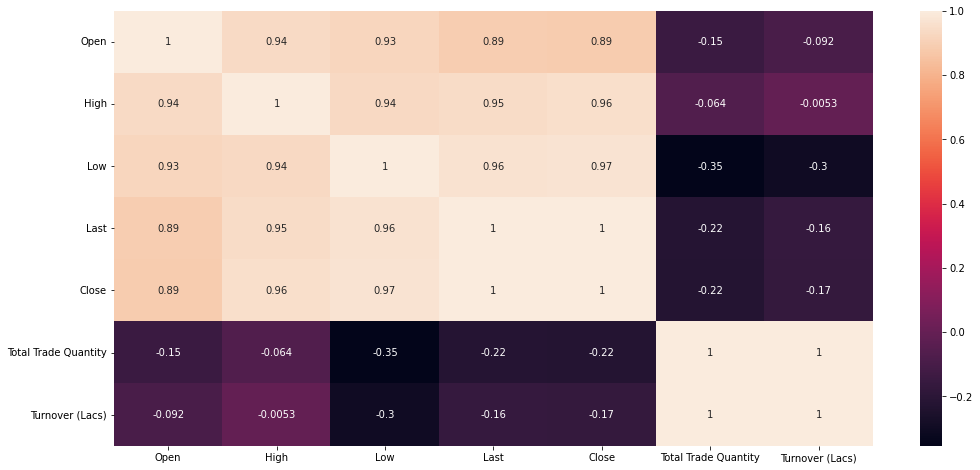

In [ ]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(data.corr(), annot = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


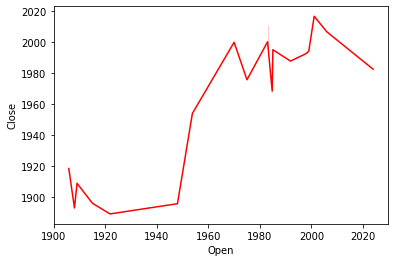

In [ ]:
sns.lineplot(data["Open"],data["Close"],data=data,color="r")

In [ ]:
#select our features
x = data.loc[:,'High':'Turnover (Lacs)']
y = data.loc[:,'Open']

In [ ]:
x.head()

,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,1990.0,1968.3,1984.00,1982.40,1610576.0,31868.00
1,2019.4,1971.0,2009.85,2010.85,3270615.0,65568.23
2,2018.0,1985.0,2003.90,2006.75,2501539.0,50131.23
3,2017.0,1979.6,1990.00,1992.70,2321216.0,46373.71
4,2003.9,1973.0,1999.85,1995.20,1680420.0,33463.26


In [ ]:
y.head()

0    1984.00
1    1983.00
2    2006.00
3    1998.00
4    1985.05
Name: Open, dtype: float64

# **LinearRegression Model**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 0)

In [ ]:
LR = LinearRegression()

**FITTING THE MODEL**

In [ ]:
LR.fit(x_train,y_train)

LinearRegression()

**MODEL SCORE**

In [ ]:
LR.score(x_test,y_test) #suggests overfitting

0.9997647484047151

In [ ]:
y_pred=LR.predict(x_test)
y_pred

array([1914.29835106, 1983.22713532])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


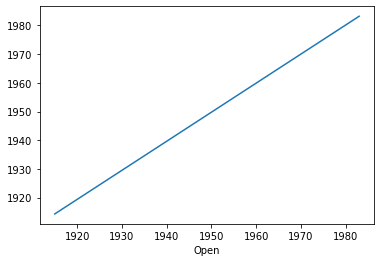

In [ ]:
sns.lineplot(y_test,y_pred)

In [ ]:
#test data of random day
Test_data = [[2017.0 ,1979.6 ,1990.00 ,1992.70 ,2321216.0 ,46373.71]]
prediction = LR.predict(Test_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(prediction)

[2001.75159573]


# **Interpretation**

**On that day TCS open on 1998.0 price and our model predicted price is 2001.75 so we can near to the prediction**

# ***ADULT DATASET***

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as pplt  
import seaborn as sns 
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/adult_csv.csv')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capitalgain     48842 non-null  int64 
 11  capitalloss     48842 non-null  int64 
 12  hoursperweek    48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
#replacing some special character columns names with proper names 
df.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'country', 'class'],
      dtype='object')

In [ ]:
df.isnull().sum()

age                 0
workclass        2799
fnlwgt              0
education           0
education-num       0
marital             0
occupation       2809
relationship        0
race                0
sex                 0
capitalgain         0
capitalloss         0
hoursperweek        0
country           857
class               0
dtype: int64

In [ ]:
df.dropna(how='any',inplace=True)

In [ ]:
df.isnull().sum()

age              0
workclass        0
fnlwgt           0
education        0
education-num    0
marital          0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
country          0
class            0
dtype: int64

**Feature Engineering**

In [ ]:
#running a loop of value_counts of each column to find out unique values. 
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- age ---
1    12074
2    11472
0     8441
3     7936
4     5299
Name: age, dtype: int64
---- workclass ---
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
---- fnlwgt ---
203488    21
125892    18
120277    18
126569    17
113364    17
          ..
101475     1
207489     1
443855     1
24694      1
350977     1
Name: fnlwgt, Length: 26741, dtype: int64
---- education ---
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int64
---- education-num ---
9     14783
10     9899
13     7570
14     2514
11  

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'country', 'class'],
      dtype='object')

In [ ]:
#dropping based on uniquness of data from the dataset 
df.drop(['education-num','age', 'hoursperweek', 'fnlwgt', 'capitalgain','capitalloss', 'country'], axis=1, inplace=True)

In [ ]:
#mapping the data into numerical data using map function
df['income'] = df['class'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [ ]:
#gender
df['gender'] = df['sex'].map({'Male': 0, 'Female': 1}).astype(int)

In [ ]:
#race
df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)

In [ ]:
#marital
df['marital'] = df['marital'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

In [ ]:
#workclass
df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)

In [ ]:
#education
df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)

In [ ]:
#occupation
df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4,'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)

In [ ]:
#relationship
df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)

In [ ]:
df.head()

,workclass,education,marital,occupation,relationship,race,sex,class,income,gender
0,1,12,5,3,0,3,Male,<=50K,0,0
1,6,12,2,7,4,3,Male,<=50K,0,0
2,5,3,4,4,0,3,Male,<=50K,0,0
3,5,11,2,4,4,0,Male,<=50K,0,0
4,5,12,2,5,1,0,Female,<=50K,0,1


In [ ]:
df.drop(['sex','class'], axis=1, inplace=True)

In [ ]:
df.head()

,workclass,education,marital,occupation,relationship,race,income,gender
0,1,12,5,3,0,3,0,0
1,6,12,2,7,4,3,0,0
2,5,3,4,4,0,3,0,0
3,5,11,2,4,4,0,0,0
4,5,12,2,5,1,0,0,1


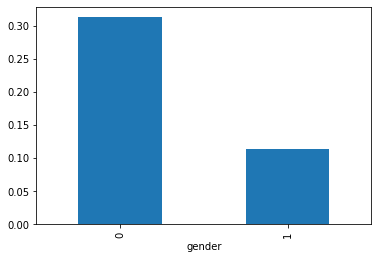

In [ ]:
#plotting a bar graph for Gender against Income to see the co-relation between these columns 
df.groupby('gender').income.mean().plot(kind='bar')

# **INFERENCE**

**The gender bar chart provides us some useful insight into the data that Men (0) are more likely to have a higher income.**

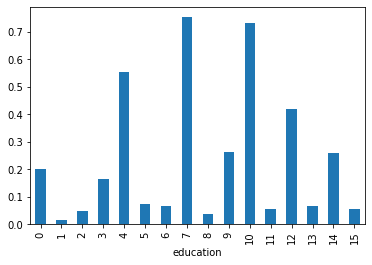

In [ ]:
#plotting a bar graph for Education against Income to see the co-relation between these columns 
df.groupby('education').income.mean().plot(kind='bar')

# **INFERENCE**

**Adults with an educational background of Prof-school (7) and Doctorate (10) will have a better income and it is likely possible that their income is higher than 50K.**

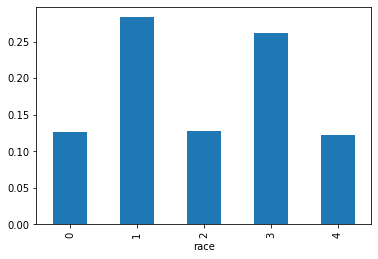

In [ ]:
#plotting a bar graph for Race against Income to see the co-relation between these columns 
df.groupby('race').income.mean().plot(kind='bar')

# **INFERENCE**

**As per the data, an Asian-Pac-Islander (1) or a white (3) have more chances of earning more than 50K.**

# **Logistic Regression:**

In [ ]:
#Transform the data set into a data frame
#X axis = We concatenate the Relationship, Education,Race,Occupation columns concate using np.c_ provided by the numpy library
df_x = pd.DataFrame(np.c_[df['relationship'], df['education'], df['race'],df['occupation'],df['gender'],df['marital'],df['workclass']], columns = ['relationship','education','race','occupation','gender','marital','workclass'])
#Y axis = Our dependent variable or the income of adult i.e Income
df_y = pd.DataFrame(df.income)

In [ ]:
reg = LogisticRegression()
#Split the data into 77% training and 33% testing data
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

In [ ]:
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#printing the accuracy values 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7583757705708926


**We achieved an accuracy value of 76% which is good for any machine learning prediction model particularly for a classification regression problem.**